In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline 

In [2]:
import pandas as pd

# Read training data.
X = pd.read_csv('x_train.csv', index_col=0)
y = pd.read_csv('y_train.csv', index_col=0)['x']

# Read task design.
design = pd.read_csv('design.csv', index_col=0)

In [3]:
from sklearn.ensemble import RandomForestRegressor

# Train model.
model = RandomForestRegressor(
    n_jobs=4,
    n_estimators=500,
    random_state=1)

model.fit(X, y.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=4, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

100%|████████████████████████████████████████| 500/500 [00:04<00:00, 114.64it/s]


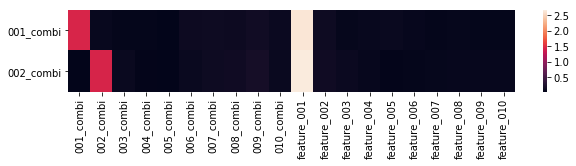

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from multitask_vi import multitask_vi_score

# Calculate scores.
scores = multitask_vi_score(model, X, y, design=design[['001_combi', '002_combi']])

# Plot as heatmap.
fig, ax = plt.subplots(figsize=(10, 1.5))
sns.heatmap(np.log2(scores.T + 1), ax=ax)